In [9]:
library(ggplot2)
library(dplyr)
library(readxl)
library(tibble)
library(DOSE)
library(wesanderson)
library(stringr)

In [113]:
plot_circadian_curves <- function(data, 
                                  ylab = 'ng/ml',
                                  x_var = "ZT", 
                                  y_var = "ng/ml", 
                                  ylim = c(0, 0.6),
                                  group_var = "genotype",
                                  palette = c("#5785C1", "#AF4E24"),
                                  theme_size = 15, 
                                  is_background = T,  
                                  is_smooth = T,
                                  is_errorbar = T,
                                  is_annotate = T){
    
    p <- ggplot(data = data, aes(x = .data[[x_var]], y = .data[[y_var]]))

    if (is_background){
        p <- p + geom_rect(aes(xmin = -Inf, xmax = 12, ymin = -Inf, ymax = Inf),
                     fill = "#9ec4e7", alpha = 0.2, inherit.aes = FALSE) +
                 geom_rect(aes(xmin = 12, xmax = Inf, ymin = -Inf, ymax = Inf),
                     fill = wes_palette("Royal2")[4], alpha = 0.2, inherit.aes = FALSE)
    }

    if (is_errorbar){
        p <- p + stat_summary(aes(group=genotype), 
                             geom = "errorbar", width = 0.5, size = 0.8, fun.data = mean_se)
    }

    if (is_smooth){
        p <- p + stat_smooth(aes(group = .data[[group_var]], colour = .data[[group_var]]),
                     method = "loess", formula = "y ~ x",
                     geom = "line", linetype = "dashed", size = 1) +
                 stat_summary(aes(group = .data[[group_var]], colour = .data[[group_var]]),
                     fun = mean, na.rm = TRUE, geom = "point", size = 2.2) 
    }
    if (is_annotate){
        p <- p + annotate(geom = "text", x = 5.7,  y = 0.67, label = "Dark",  color = "black") +
                 annotate(geom = "text", x = 15.5, y = 0.67, label = "Light", color = "black") 
    }
    p <- p + scale_y_continuous(name = ylab) +
        coord_cartesian(clip = "off", ylim = ylim) +
        scale_x_continuous(name = "ZT (hr)", breaks = unique(data[[x_var]])) +
        scale_shape_manual(values = c(15, 16)) +
        scale_color_manual(values = palette) +
        theme_dose(theme_size) +
        theme(legend.text = element_text(size = 12),
              legend.position = "bottom",
              legend.direction = "horizontal",
              legend.title = element_blank(),
              legend.spacing.x = unit(0.15, "cm"),
              plot.margin = unit(c(1.5, 1, 0.5, 1), "cm")
        )

    suppressWarnings(print(p))
}

## Melatonin in serum

In [114]:
melatonin.data <- read_excel("../Data/Circadian/Melatonin.xlsx", sheet = "Sheet3")

In [115]:
melatonin.data$genotype <- str_replace(string = melatonin.data$genotype, 
                                       pattern = "KO", replacement = "brS6KO")

In [116]:
melatonin.data$genotype <- factor(melatonin.data$genotype, levels = c("WT", "brS6KO"))

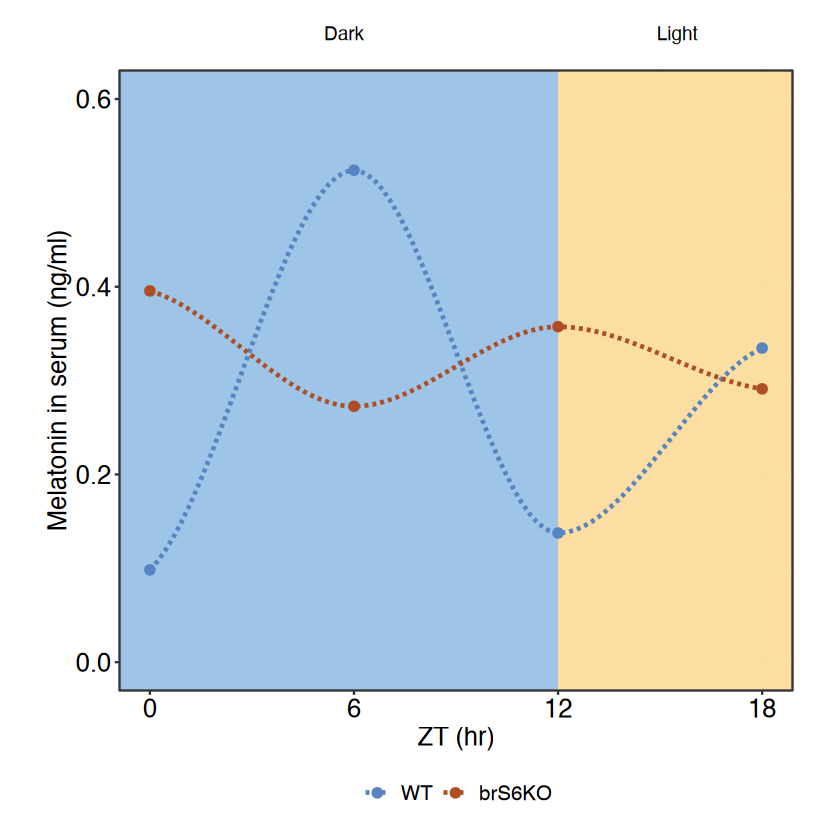

In [118]:
plot_circadian_curves(melatonin.data, ylab = "Melatonin in serum (ng/ml)", is_errorbar = F)

## Aanat, Asmt

In [164]:
path_to_data <- "../Data/Circadian/AANAT_brain.xlsx"
aanat.data <- read_excel(path_to_data, sheet = "AANAT_data")

In [165]:
aanat.data$genotype <- str_replace(string = aanat.data$genotype, 
                                       pattern = "KO", replacement = "brS6KO")
aanat.data$genotype <- factor(aanat.data$genotype, levels = c("WT", "brS6KO"))

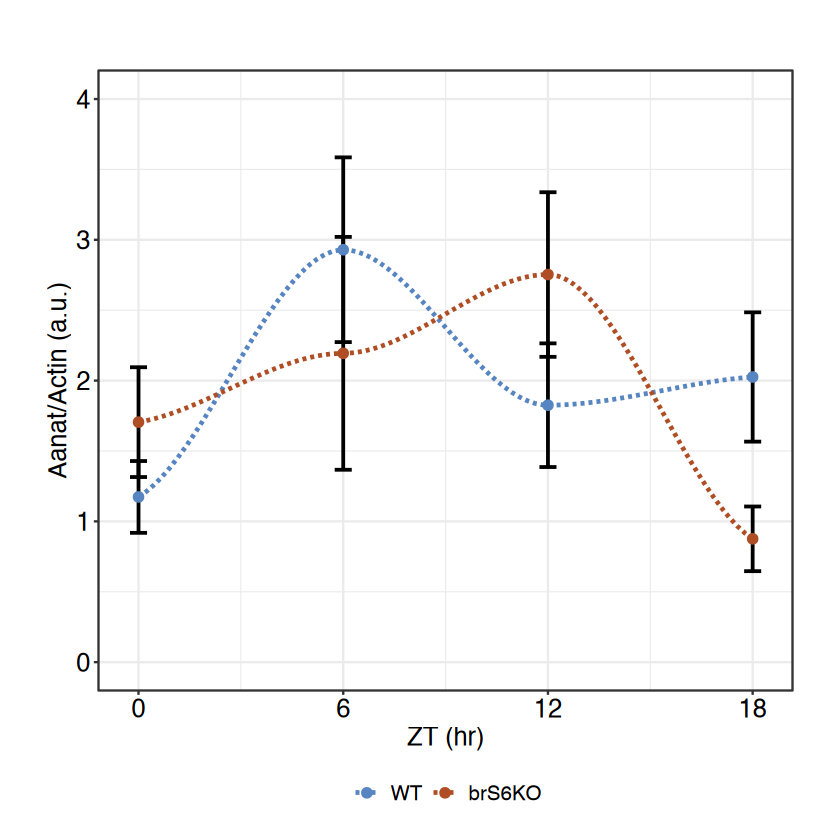

In [168]:
plot_circadian_curves(aanat.data, y_var = "AANAT/Actin", ylim = c(0,4), ylab = "Aanat/Actin (a.u.)", 
                      is_background = F, is_annotate = F, is_errorbar = T)

In [160]:
path_to_data <- "../Data/Circadian/Asmt_brain.xlsx"
asmt.data <- read_excel(path_to_data, sheet = "Asmt_data")

In [161]:
asmt.data <- asmt.data %>% filter(genotype != 'het')
asmt.data$genotype <- str_replace(string = asmt.data$genotype, 
                                       pattern = "KO", replacement = "brS6KO")
asmt.data$genotype <- factor(asmt.data$genotype, levels = c("WT", "brS6KO"))

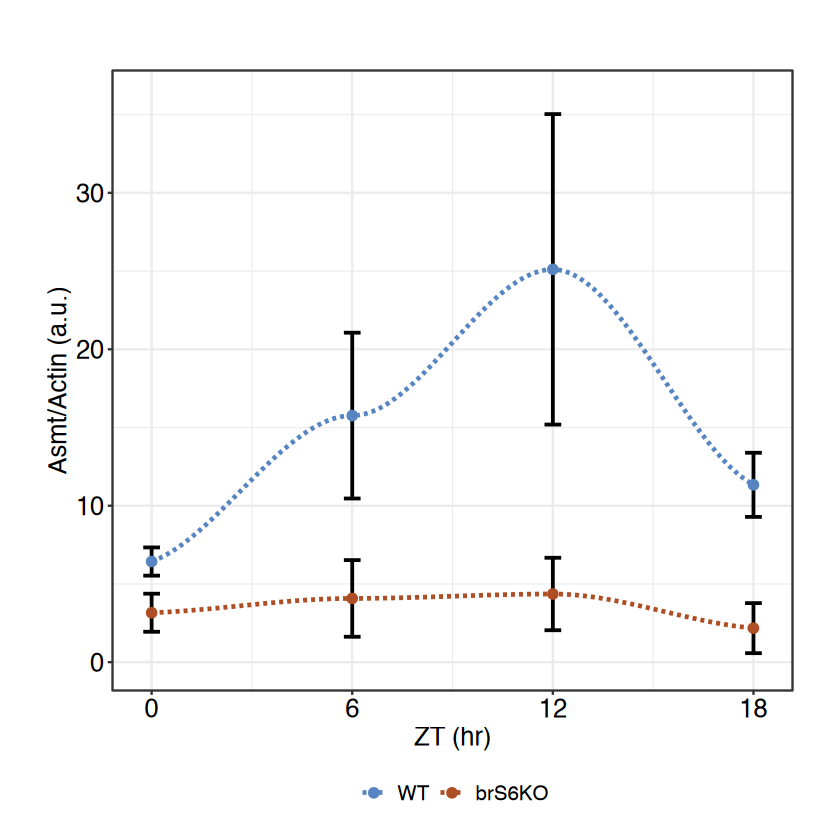

In [162]:
plot_circadian_curves(asmt.data, y_var = "Asmt/Actin", ylim = c(0,36), ylab = "Asmt/Actin (a.u.)", 
                      is_background = F, is_annotate = F, is_errorbar = T)

## Cry1, Per1, Per2 in liver

In [119]:
path_to_data <- "../Data/Circadian/Cry1_Per2_Per1_liver.xlsx"
cry1.data <- read_excel(path_to_data, sheet = "Cry1_data")
per1.data <- read_excel(path_to_data, sheet = "Per1_data")
per2.data <- read_excel(path_to_data, sheet = "Per2_data")

In [120]:
cry1.data$genotype <- str_replace(string = cry1.data$genotype, 
                                       pattern = "KO", replacement = "brS6KO")
per1.data$genotype <- str_replace(string = per1.data$genotype, 
                                       pattern = "KO", replacement = "brS6KO")
per2.data$genotype <- str_replace(string = per2.data$genotype, 
                                       pattern = "KO", replacement = "brS6KO")

In [121]:
cry1.data$genotype <- factor(cry1.data$genotype, levels = c("WT", "brS6KO"))
per1.data$genotype <- factor(per1.data$genotype, levels = c("WT", "brS6KO"))
per2.data$genotype <- factor(per2.data$genotype, levels = c("WT", "brS6KO"))

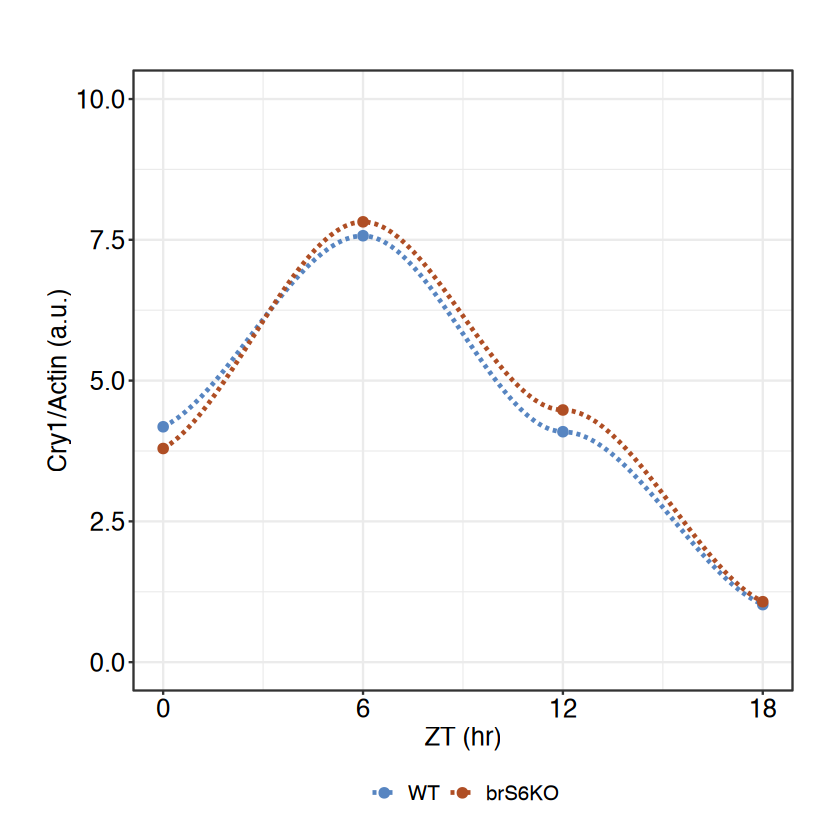

In [122]:
plot_circadian_curves(cry1.data, y_var = "Cry1/Actin", ylim = c(0,10), ylab = "Cry1/Actin (a.u.)", 
                      is_background = F, is_annotate = F, is_errorbar = F)

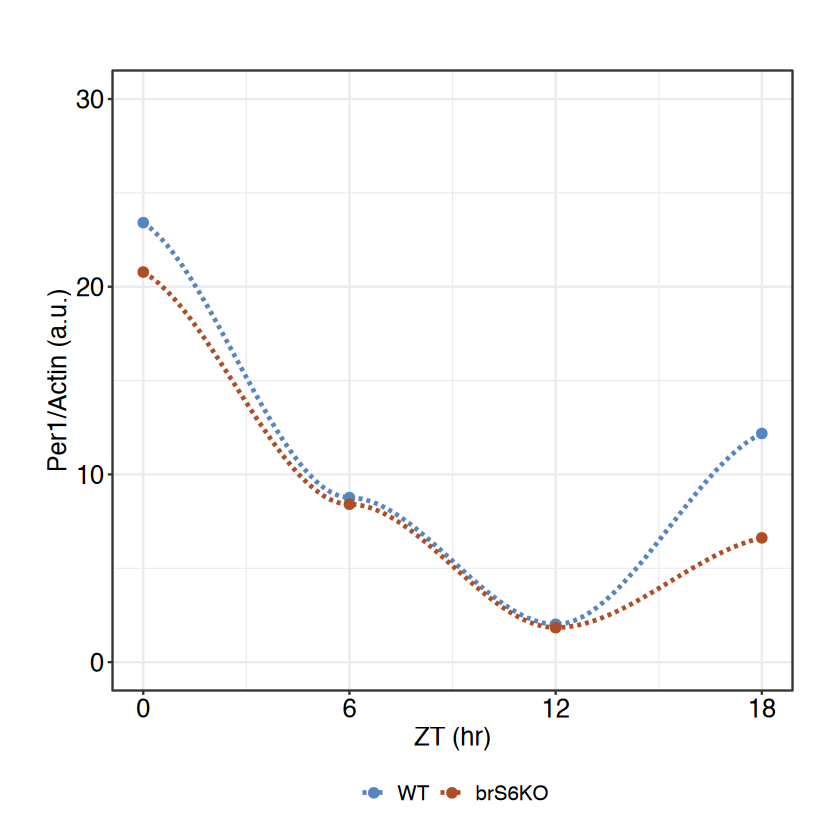

In [123]:
plot_circadian_curves(per1.data, y_var = "PER1/Actin", ylim = c(0,30), ylab = "Per1/Actin (a.u.)", 
                      is_background = F, is_annotate = F, is_errorbar = F)

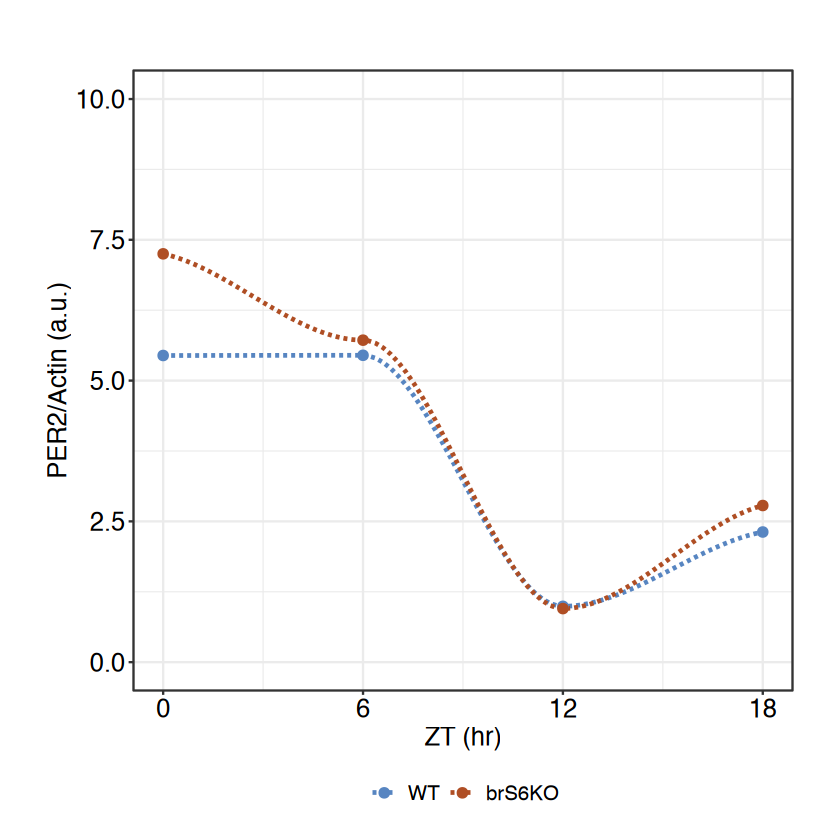

In [124]:
plot_circadian_curves(per2.data, y_var = "PER2/Actin", ylim = c(0,10), ylab = "PER2/Actin (a.u.)", 
                      is_background = F, is_annotate = F, is_errorbar = F)

## Cry1, Per1, Per2 in the brain

In [127]:
path_to_data <- "../Data/Circadian/Cry1_Per2_Per1_brain.xlsx"
cry1.data <- read_excel(path_to_data, sheet = "Cry1_data")
per1.data <- read_excel(path_to_data, sheet = "PER1_data")
per2.data <- read_excel(path_to_data, sheet = "PER2_data")

In [128]:
cry1.data$genotype <- str_replace(string = cry1.data$genotype, 
                                       pattern = "KO", replacement = "brS6KO")
per1.data$genotype <- str_replace(string = per1.data$genotype, 
                                       pattern = "KO", replacement = "brS6KO")
per2.data$genotype <- str_replace(string = per2.data$genotype, 
                                       pattern = "KO", replacement = "brS6KO")

In [129]:
cry1.data$genotype <- factor(cry1.data$genotype, levels = c("WT", "brS6KO"))
per1.data$genotype <- factor(per1.data$genotype, levels = c("WT", "brS6KO"))
per2.data$genotype <- factor(per2.data$genotype, levels = c("WT", "brS6KO"))

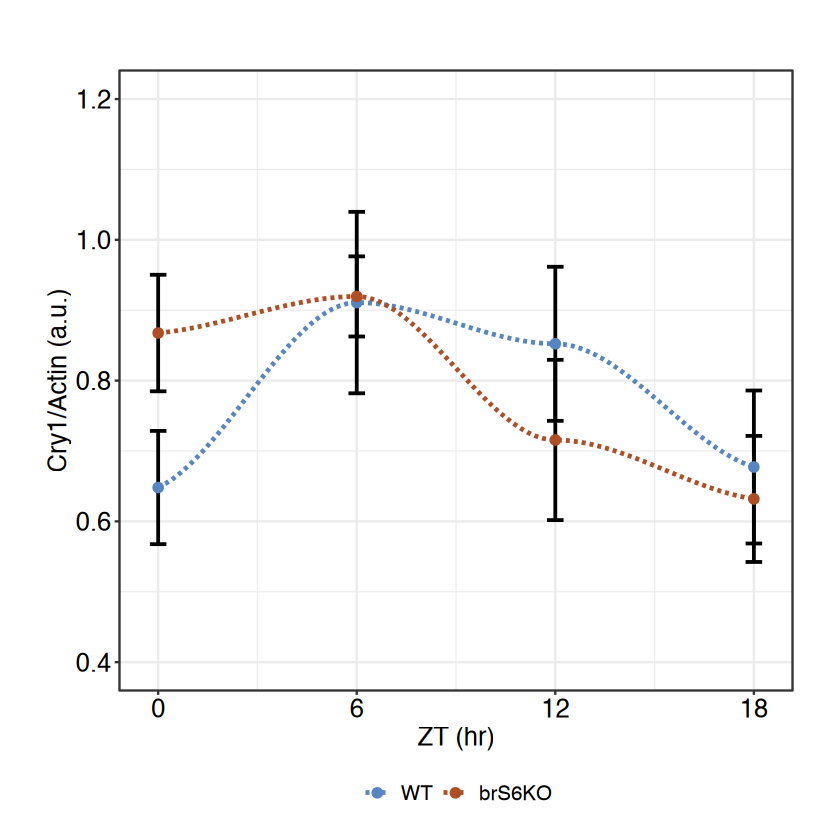

In [130]:
plot_circadian_curves(cry1.data, y_var = "Cry1/Actin", ylim = c(0.4,1.2), ylab = "Cry1/Actin (a.u.)", 
                      is_background = F, is_annotate = F)

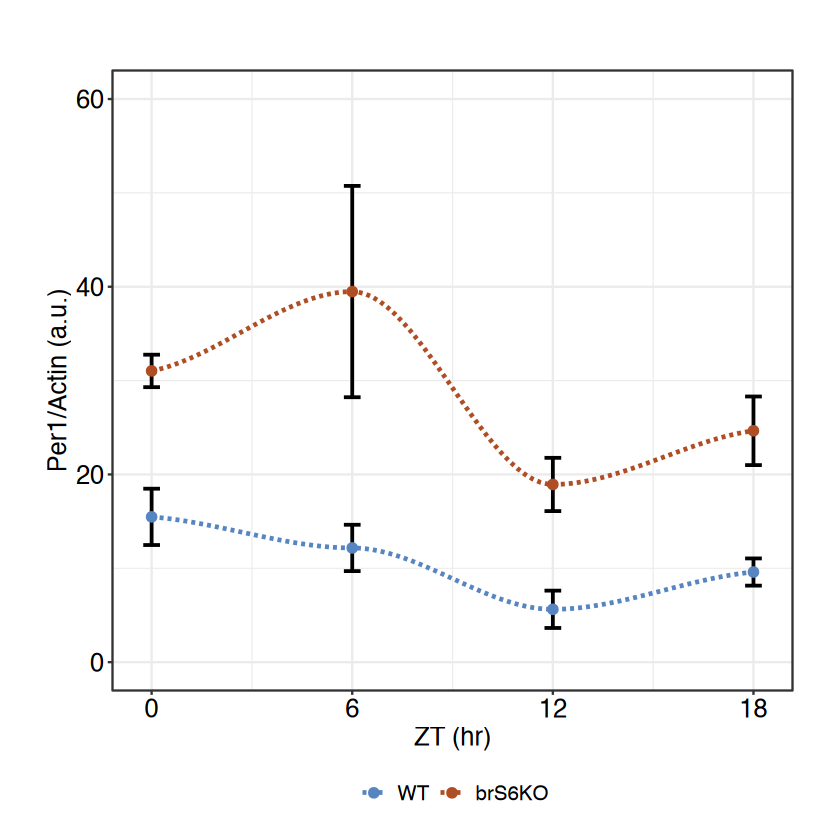

In [132]:
plot_circadian_curves(per1.data, y_var = "PER1/Actin", ylim = c(0,60), ylab = "Per1/Actin (a.u.)", 
                      is_background = F, is_annotate = F)

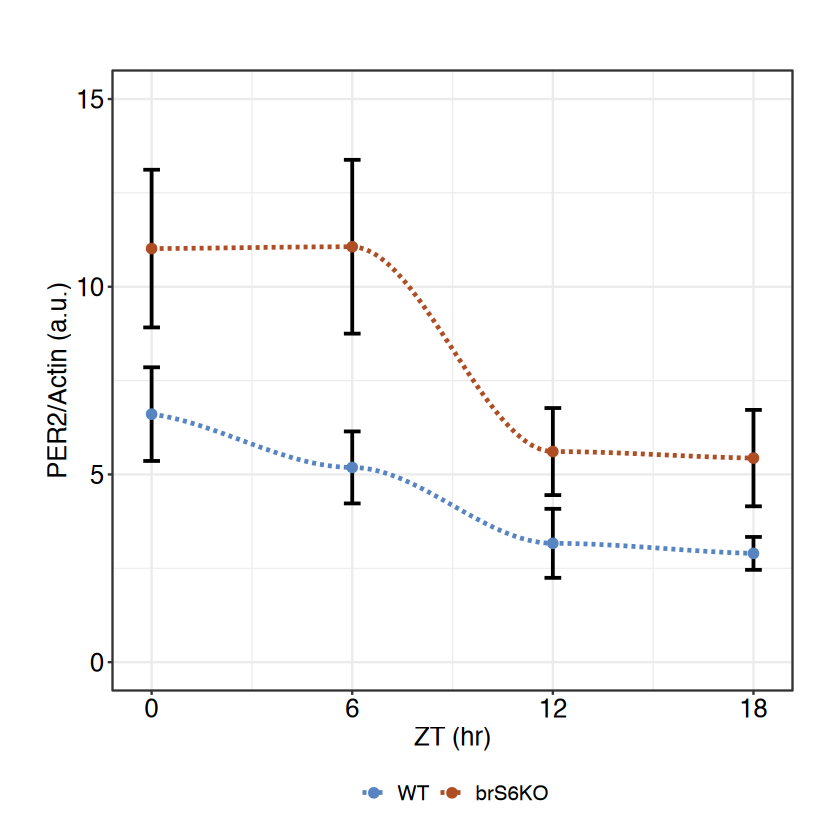

In [134]:
plot_circadian_curves(per2.data, y_var = "PER2/Actin", ylim = c(0,15), ylab = "PER2/Actin (a.u.)", 
                      is_background = F, is_annotate = F)

## TDO2 and IDO2 in the brain

In [146]:
path_to_data <- "../Data/Circadian/TDO2_brain.xlsx"
tdo2.data <- read_excel(path_to_data, sheet = "TDO2_data")

In [147]:
tdo2.data <- tdo2.data %>% filter(genotype != 'het')
tdo2.data$genotype <- str_replace(string = tdo2.data$genotype, 
                                       pattern = "KO", replacement = "brS6KO")
tdo2.data$genotype <- factor(tdo2.data$genotype, levels = c("WT", "brS6KO"))

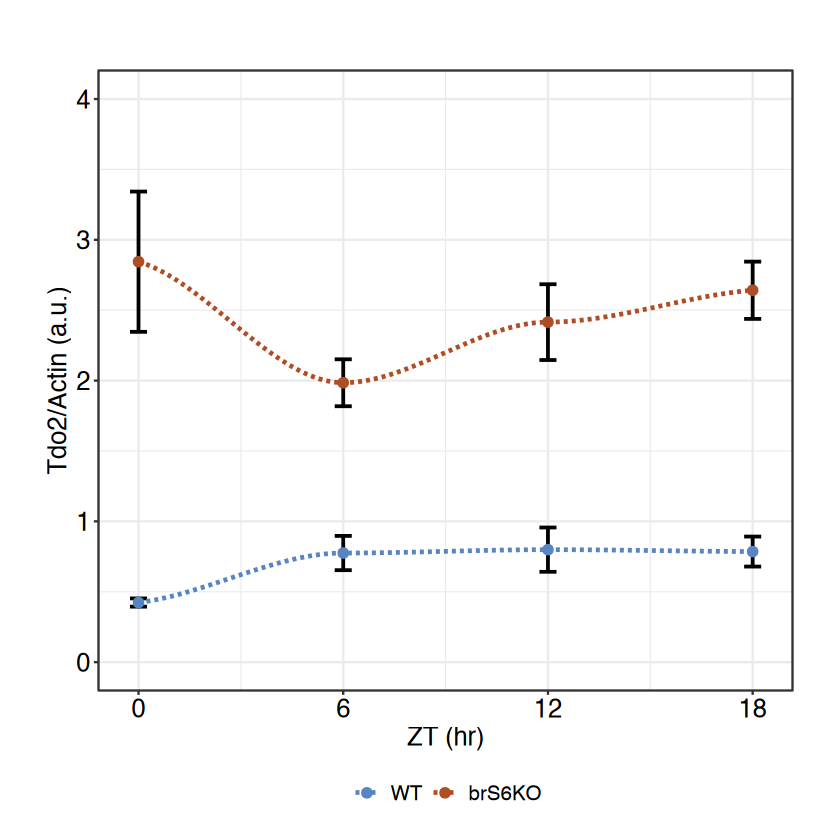

In [148]:
plot_circadian_curves(tdo2.data, y_var = "TDO2/Actin", ylim = c(0,4), ylab = "Tdo2/Actin (a.u.)", 
                      is_background = F, is_annotate = F)

In [153]:
path_to_data <- "../Data/Circadian/IDO2_brain.xlsx"
ido2.data <- read_excel(path_to_data, sheet = "IDO2_data", skip = 1)

In [154]:
ido2.data$genotype <- str_replace(string = ido2.data$genotype, 
                                       pattern = "KO", replacement = "brS6KO")
ido2.data$genotype <- factor(ido2.data$genotype, levels = c("WT", "brS6KO"))

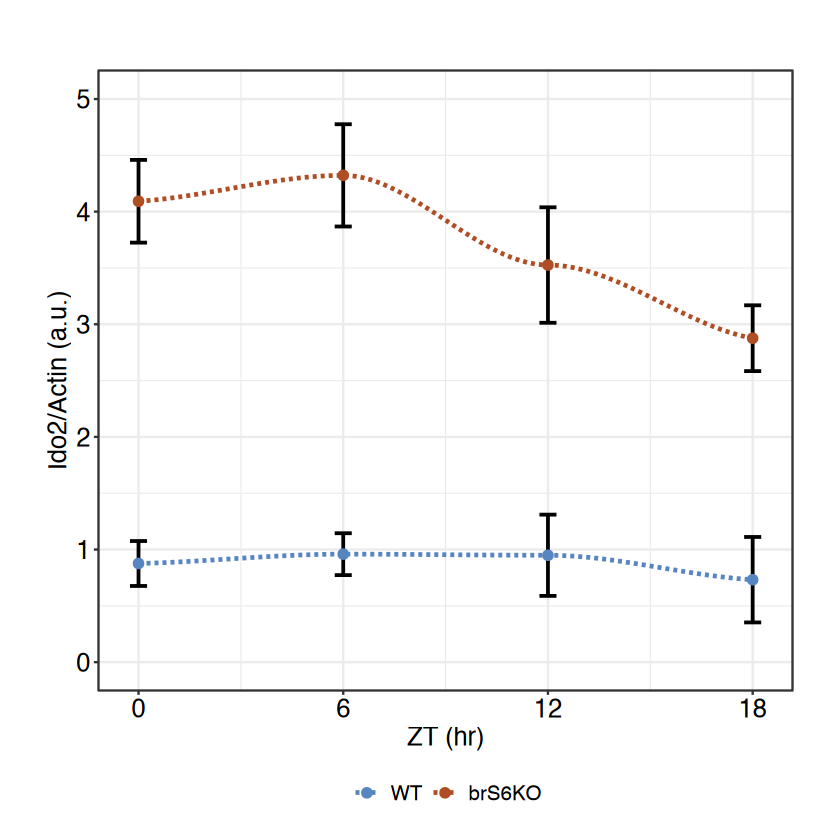

In [156]:
plot_circadian_curves(ido2.data, y_var = "IDO2/Actin", ylim = c(0,5), ylab = "Ido2/Actin (a.u.)", 
                      is_background = F, is_annotate = F)

## Tph1, Tph2

In [187]:
path_to_data <- "../Data/Circadian/Tph2.xlsx"
tph2.data <- read_excel(path_to_data, sheet = "Tph2_data")

In [188]:
tph2.data$genotype <- str_replace(string = tph2.data$genotype, 
                                       pattern = "KO", replacement = "brS6KO")

In [189]:
tph2.data$genotype <- factor(tph2.data$genotype, levels = c("WT", "brS6KO"))

In [190]:
colnames(tph2.data) <- c('mouse', 'ZT', 'sex', 'genotype', 'Tph2/Actin')

In [191]:
tph2.data$ZT <- factor(tph2.data$ZT, levels = c(0, 6, 12, 18))

In [192]:
tph2.data$ZT <- as.numeric(levels(tph2.data$ZT))[tph2.data$ZT]

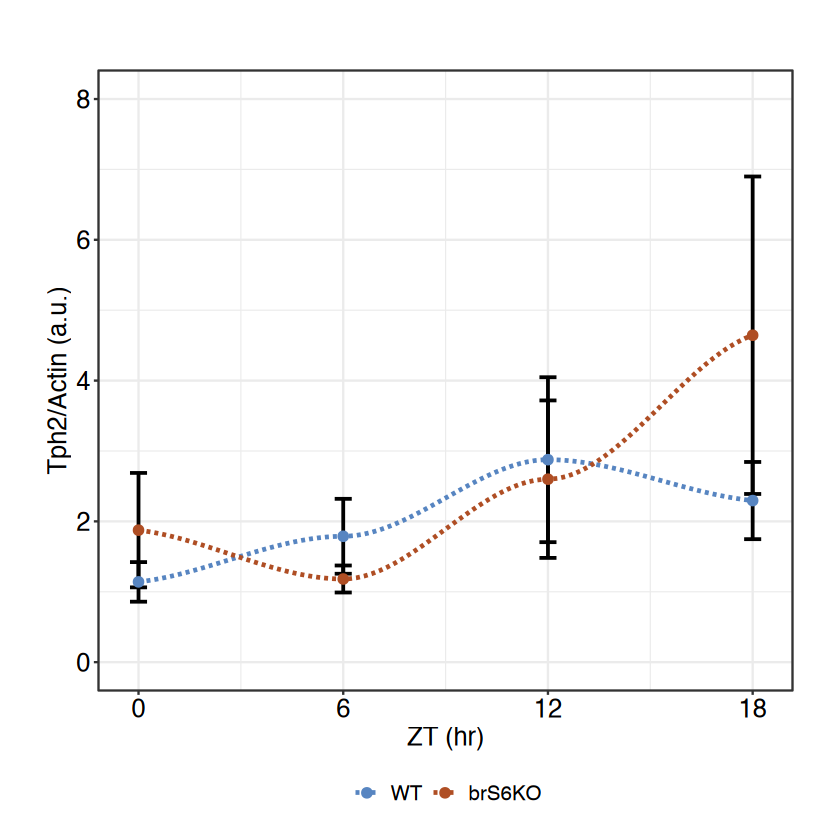

In [193]:
plot_circadian_curves(tph2.data, y_var = "Tph2/Actin", ylim = c(0,8), ylab = "Tph2/Actin (a.u.)", 
                      is_background = F, is_annotate = F)

In [196]:
path_to_data <- "../Data/Circadian/Tph1.xlsx"
tph1.data <- read_excel(path_to_data, sheet = "Tph1_data")

In [197]:
tph1.data$genotype <- str_replace(string = tph1.data$genotype, 
                                       pattern = "KO", replacement = "brS6KO")

tph1.data$genotype <- factor(tph1.data$genotype, levels = c("WT", "brS6KO"))

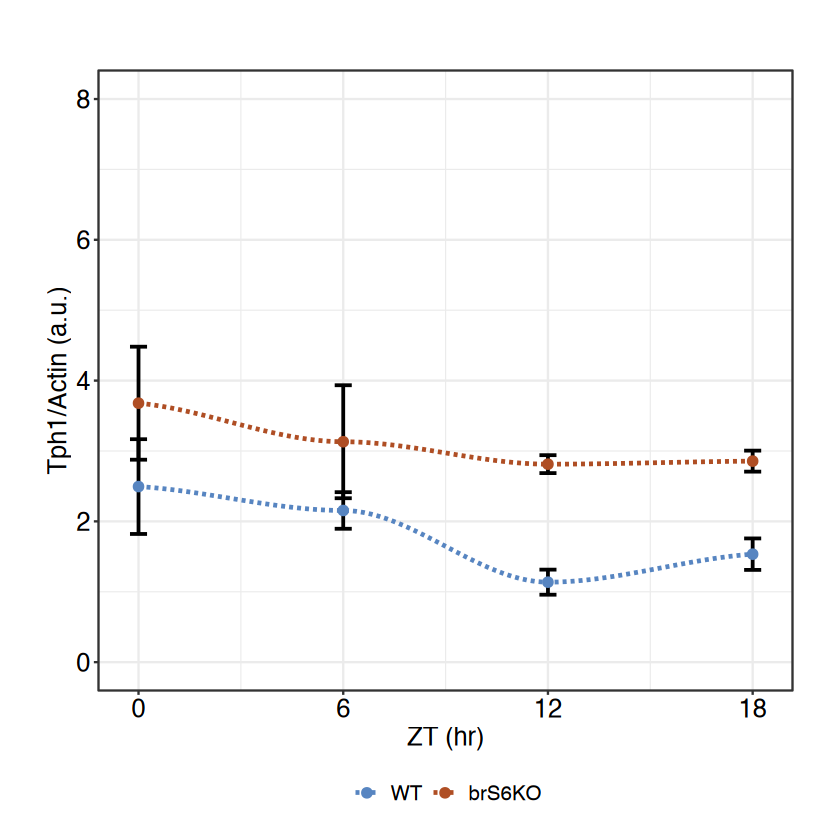

In [200]:
plot_circadian_curves(tph1.data, y_var = "Tph1/Actin", ylim = c(0,8), ylab = "Tph1/Actin (a.u.)", 
                      is_background = F, is_annotate = F)

## Ddc, Ido1

In [212]:
path_to_data <- "../Data/Circadian/Ido1_Ddc.xlsx"
ido1.data <- read_excel(path_to_data, sheet = "Ido1_data")
ddc.data <- read_excel(path_to_data, sheet = "Ddc_data")

In [213]:
ido1.data$genotype <- str_replace(string = ido1.data$genotype, 
                                       pattern = "KO", replacement = "brS6KO")
ido1.data$genotype <- factor(ido1.data$genotype, levels = c("WT", "brS6KO"))

In [214]:
ddc.data$genotype <- str_replace(string = ddc.data$genotype, 
                                       pattern = "KO", replacement = "brS6KO")
ddc.data$genotype <- factor(ddc.data$genotype, levels = c("WT", "brS6KO"))

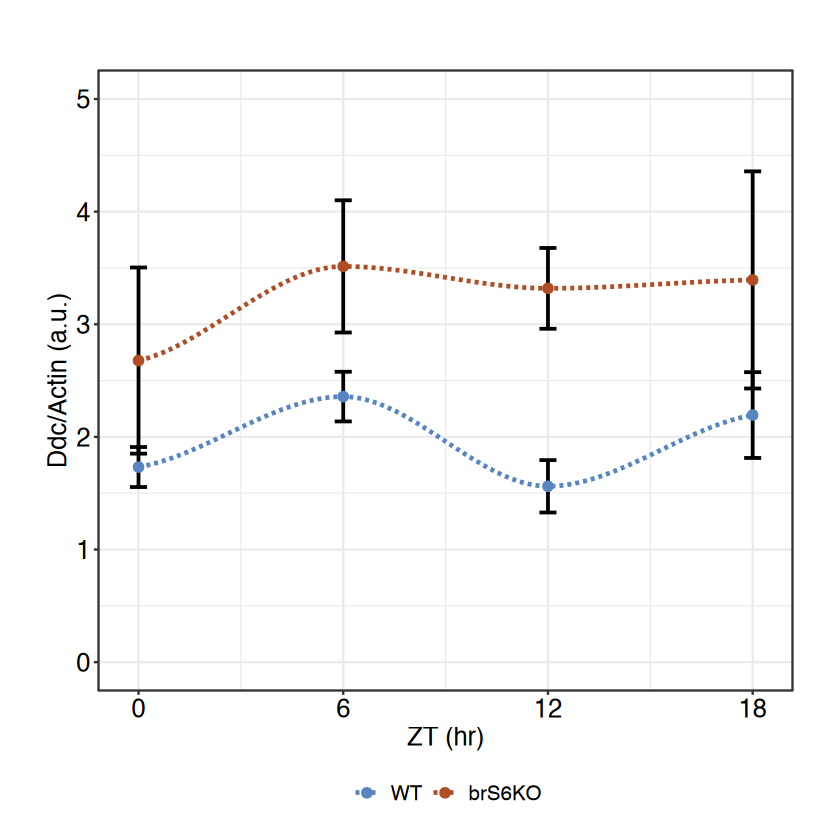

In [215]:
plot_circadian_curves(ddc.data, y_var = "Ddc/Actin", ylim = c(0,5), ylab = "Ddc/Actin (a.u.)", 
                      is_background = F, is_annotate = F)

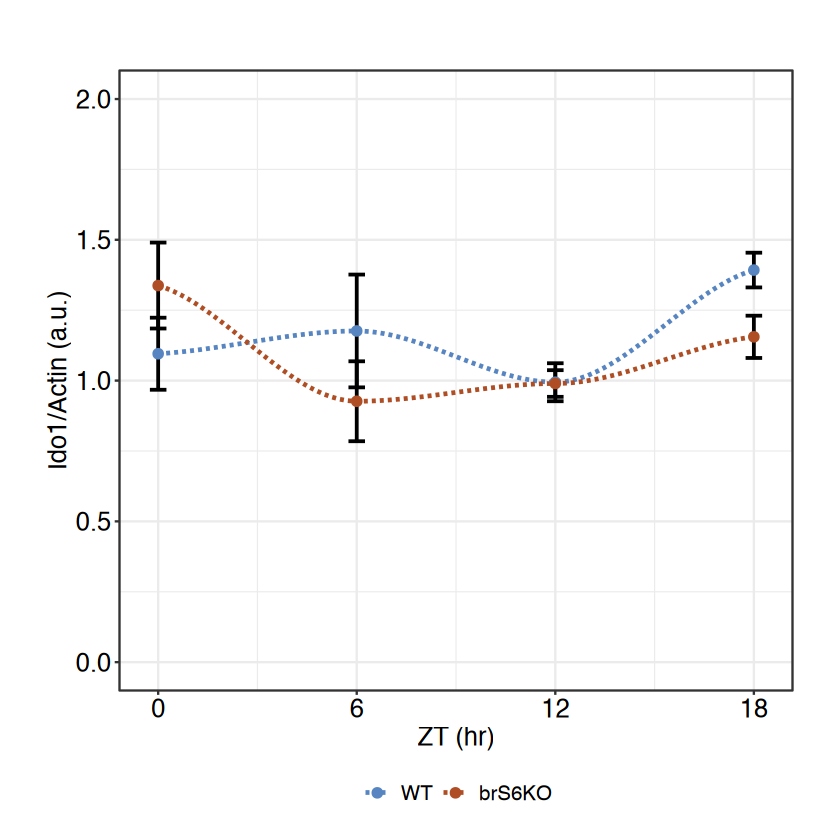

In [216]:
plot_circadian_curves(ido1.data, y_var = "IDO1/Actin", ylim = c(0,2), ylab = "Ido1/Actin (a.u.)", 
                      is_background = F, is_annotate = F)

In [217]:
sessionInfo()

R version 4.4.1 (2024-06-14)
Platform: aarch64-apple-darwin20
Running under: macOS Sonoma 14.5

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.4-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.12.0

locale:
[1] ru_RU.UTF-8/ru_RU.UTF-8/ru_RU.UTF-8/C/ru_RU.UTF-8/ru_RU.UTF-8

time zone: Europe/Moscow
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] stringr_1.5.1     wesanderson_0.3.7 DOSE_3.30.5       tibble_3.3.0     
[5] readxl_1.4.5      dplyr_1.1.4       ggplot2_3.5.2    

loaded via a namespace (and not attached):
 [1] tidyselect_1.2.1        IRdisplay_1.1           farver_2.1.2           
 [4] blob_1.2.4              R.utils_2.12.3          Biostrings_2.72.1      
 [7] fastmap_1.2.0           digest_0.6.37           lifecycle_1.0.4        
[10] Cairo_1.6-